In [1]:
# install pycaret
!pip install pycaret


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 KB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 KB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 KB 1.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00


In [2]:
# import libraries
import pandas as pd
import numpy as np# read csv data
data = pd.read_csv('https://raw.githubusercontent.com/srees1988/predict-churn-py/main/customer_churn_data.csv')

data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# check data dimensions
data.shape


(7043, 21)

In [4]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# replace blanks with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.nan)


In [6]:
# convert to float64
data['TotalCharges'] = data['TotalCharges'].astype('float64')


In [7]:
import plotly.express as px

fig = px.scatter(x=data['tenure'], y=data['TotalCharges'], 
                 color = data['Churn'], template = 'presentation', 
                 opacity = 0.5, facet_col = data['Contract'], 
                 title = 'Customer Churn by Tenure, Charges, and Contract Type',
                 labels = {'x' : 'Customer Tenure', 'y' : 'Total Charges $'})
                
fig.show()


In [8]:
# check missing values
data.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# init setup
from pycaret.classification import *
s = setup(data, target = 'Churn', ignore_features = ['customerID'])


,Description,Value
0,Session id,1041
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 21)"
5,Transformed data shape,"(7043, 41)"
6,Transformed train set shape,"(4930, 41)"
7,Transformed test set shape,"(2113, 41)"
8,Ignore features,1
9,Ordinal features,5


In [10]:
# compare all models
best_model = compare_models(sort='AUC')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8032,0.8451,0.5314,0.6623,0.5892,0.4619,0.4671,1.2300
gbc,Gradient Boosting Classifier,0.8026,0.8440,0.5283,0.6609,0.5868,0.4593,0.4645,1.8250
lr,Logistic Regression,0.8024,0.8434,0.5436,0.6551,0.5935,0.4646,0.4685,1.3770
lda,Linear Discriminant Analysis,0.7957,0.8357,0.5451,0.6338,0.5858,0.4513,0.4538,1.1490
lightgbm,Light Gradient Boosting Machine,0.7874,0.8294,0.5083,0.6225,0.5591,0.4210,0.4251,0.9500
nb,Naive Bayes,0.6848,0.8193,0.8494,0.4506,0.5886,0.3702,0.4196,0.5580
xgboost,Extreme Gradient Boosting,0.7838,0.8175,0.5130,0.6107,0.5572,0.4156,0.4187,2.0990
rf,Random Forest Classifier,0.7878,0.8164,0.4953,0.6268,0.5531,0.4165,0.4216,1.6780
qda,Quadratic Discriminant Analysis,0.6546,0.8147,0.8488,0.4365,0.5695,0.3352,0.3932,0.4650
et,Extra Trees Classifier,0.7698,0.7830,0.4747,0.5819,0.5223,0.3728,0.3765,2.1350


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [11]:
# print best_model parameters
print(best_model)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=1041)


In [12]:
# tune the best model
tuned_best_model = tune_model(best_model)


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7850,0.8406,0.5231,0.6071,0.5620,0.4206,0.4226
1,0.8235,0.8486,0.5462,0.7172,0.6201,0.5079,0.5159
2,0.7951,0.8260,0.5038,0.6471,0.5665,0.4351,0.4409
3,0.8154,0.8562,0.5802,0.6786,0.6255,0.5040,0.5068
4,0.8114,0.8496,0.5420,0.6827,0.6043,0.4826,0.4881
5,0.8134,0.8666,0.5344,0.6931,0.6034,0.4841,0.4911
6,0.7850,0.8370,0.5420,0.6068,0.5726,0.4296,0.4308
7,0.8073,0.8740,0.5344,0.6731,0.5957,0.4714,0.4768
8,0.8093,0.8397,0.5191,0.6869,0.5913,0.4701,0.4779


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


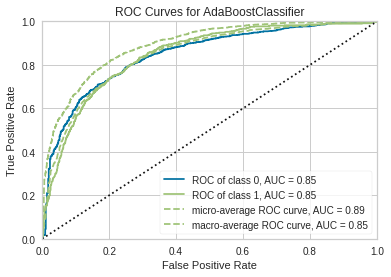

In [13]:
# Analyse the AUC Plot
plot_model(tuned_best_model, plot = 'auc')


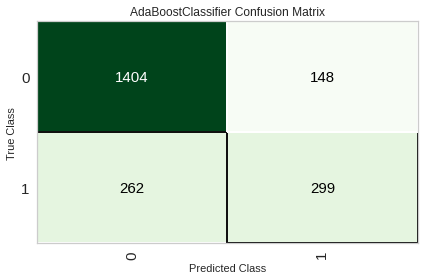

In [14]:
# Analyse the Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')


In [15]:
# compare all models
best_model = compare_models(sort='Recall')


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.6848,0.8193,0.8494,0.4506,0.5886,0.3702,0.4196,0.3080
qda,Quadratic Discriminant Analysis,0.6546,0.8147,0.8488,0.4365,0.5695,0.3352,0.3932,0.3770
lda,Linear Discriminant Analysis,0.7957,0.8357,0.5451,0.6338,0.5858,0.4513,0.4538,0.3180
lr,Logistic Regression,0.8024,0.8434,0.5436,0.6551,0.5935,0.4646,0.4685,0.7510
ada,Ada Boost Classifier,0.8032,0.8451,0.5314,0.6623,0.5892,0.4619,0.4671,0.3810
gbc,Gradient Boosting Classifier,0.8026,0.8440,0.5283,0.6609,0.5868,0.4593,0.4645,0.8350
svm,SVM - Linear Kernel,0.6974,0.0000,0.5214,0.5411,0.4705,0.2873,0.3239,0.3170
ridge,Ridge Classifier,0.7990,0.0000,0.5145,0.6542,0.5756,0.4464,0.4522,0.2820
xgboost,Extreme Gradient Boosting,0.7838,0.8175,0.5130,0.6107,0.5572,0.4156,0.4187,0.5420
lightgbm,Light Gradient Boosting Machine,0.7874,0.8294,0.5083,0.6225,0.5591,0.4210,0.4251,0.3310


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [16]:
# print best_model parameters
print(best_model)

GaussianNB(priors=None, var_smoothing=1e-09)


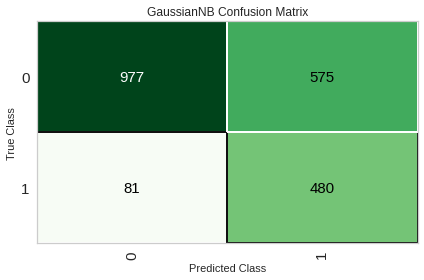

In [18]:
# Analyse the Confusion Matrix of the best model
plot_model(best_model, plot = 'confusion_matrix')

In [17]:
# tune the best model
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7444,0.7900,0.6769,0.5116,0.5828,0.4037,0.4119
1,0.7647,0.7984,0.6615,0.5443,0.5972,0.4332,0.4374
2,0.7160,0.7510,0.5954,0.4727,0.5270,0.3279,0.3324
3,0.7647,0.8098,0.6641,0.5472,0.6000,0.4355,0.4396
4,0.7647,0.7894,0.6260,0.5503,0.5857,0.4224,0.4241
5,0.7688,0.8215,0.6718,0.5535,0.6069,0.4453,0.4494
6,0.7302,0.7711,0.6641,0.4943,0.5668,0.3770,0.3856
7,0.7505,0.8096,0.6412,0.5250,0.5773,0.4028,0.4069
8,0.7606,0.8032,0.6183,0.5436,0.5786,0.4124,0.4141


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


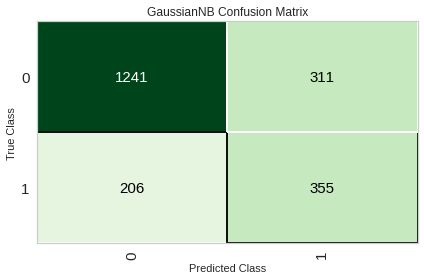

In [19]:
# Analyse the Confusion Matrix
plot_model(tuned_best_model, plot = 'confusion_matrix')
